In [9]:
#Analysis of Price with seasonal varitation
#Data Preprocessing

import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')


In [10]:
calendarDetailDF=pd.read_csv("calendar_detail.csv")

In [11]:
calendarDetailDF

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00
5,2515,2018-09-26,t,$99.00
6,2515,2018-09-25,t,$99.00
7,2515,2018-09-24,t,$99.00
8,2515,2018-09-23,t,$99.00
9,2515,2018-09-22,t,$99.00


In [12]:
#Replace NaN value with 0

calendarDetailDF.fillna(0, inplace=True)
calendarDetailDF = calendarDetailDF[calendarDetailDF.price != 0]

In [13]:
calendarDetailDF

,listing_id,date,available,price
0,2515,2018-10-01,t,$99.00
1,2515,2018-09-30,t,$89.00
2,2515,2018-09-29,t,$99.00
3,2515,2018-09-28,t,$99.00
4,2515,2018-09-27,t,$99.00
5,2515,2018-09-26,t,$99.00
6,2515,2018-09-25,t,$99.00
7,2515,2018-09-24,t,$99.00
8,2515,2018-09-23,t,$99.00
9,2515,2018-09-22,t,$99.00


In [14]:
cost = calendarDetailDF['price']
prices=[]

for c in cost:
    c = re.sub('[^0-9.]+','', c)
    prices.append(float(c))
    
calendarDetailDF['price']=prices

calendarDetailDF = calendarDetailDF[calendarDetailDF.price >= 0]

#split the date col as date, month and day for analysis
calendarDetailDF['Year'],calendarDetailDF['Month'],calendarDetailDF['Day']=calendarDetailDF['date'].str.split('-',2).str
calendarDetailDF.head()


,listing_id,date,available,price,Year,Month,Day
0,2515,2018-10-01,t,99.0,2018,10,01
1,2515,2018-09-30,t,89.0,2018,09,30
2,2515,2018-09-29,t,99.0,2018,09,29
3,2515,2018-09-28,t,99.0,2018,09,28
4,2515,2018-09-27,t,99.0,2018,09,27


In [7]:
calendarDetailDF

,listing_id,date,available,price,Year,Month,Day
0,2515,2018-10-01,t,99.0,2018,10,01
1,2515,2018-09-30,t,89.0,2018,09,30
2,2515,2018-09-29,t,99.0,2018,09,29
3,2515,2018-09-28,t,99.0,2018,09,28
4,2515,2018-09-27,t,99.0,2018,09,27
5,2515,2018-09-26,t,99.0,2018,09,26
6,2515,2018-09-25,t,99.0,2018,09,25
7,2515,2018-09-24,t,99.0,2018,09,24
8,2515,2018-09-23,t,99.0,2018,09,23
9,2515,2018-09-22,t,99.0,2018,09,22


In [15]:
#To analyze the avg. price Trend for year and Month

ydf=calendarDetailDF.groupby(['Year','Month']).price.mean()
ydf=ydf.reset_index()
ydf=ydf.rename(columns={'price':'mean_Price'})
ydf['year-Month']=ydf['Year'].map(str) + "-" + ydf['Month'].map(str)
ydf.to_csv('year_month_data.csv')
ydf.head()

,Year,Month,mean_Price,year-Month
0,2017,10,177.907201,2017-10
1,2017,11,164.961332,2017-11
2,2017,12,168.393642,2017-12
3,2018,01,160.693973,2018-01
4,2018,02,160.583151,2018-02


In [16]:
ydf

,Year,Month,mean_Price,year-Month
0,2017,10,177.907201,2017-10
1,2017,11,164.961332,2017-11
2,2017,12,168.393642,2017-12
3,2018,01,160.693973,2018-01
4,2018,02,160.583151,2018-02
5,2018,03,166.697515,2018-03
6,2018,04,174.978801,2018-04
7,2018,05,175.628840,2018-05
8,2018,06,175.936978,2018-06
9,2018,07,175.819912,2018-07


Text(0,0.5,'Average Price')

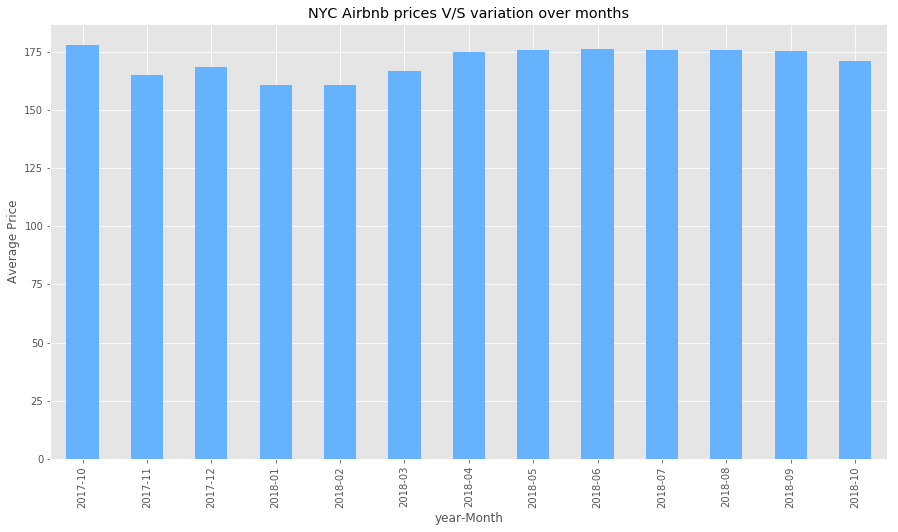

In [25]:
#Plot the above details on Graph as Bar Charts

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = ydf['year-Month']
y_pos = ydf['mean_Price']

ydf.plot(kind='bar', 
           x='year-Month',
           y='mean_Price',
           color = '#67b2fe', 
           figsize =(15,8), 
           title = 'NYC Airbnb prices V/S variation over months', 
           legend = False)
plt.ylabel('Average Price')


In [ ]:
The maximum average price can be observed in year 2017 and month October.While the mean price shows similar trend
for year 2018, June,July and August. Also it can be concluded that mean price is very less just after new year eve.

In [19]:
from datetime import date
import datetime
import calendar
import holidays

calendarDetailDF.fillna(0, inplace=True)
us_holidays = holidays.US()

calendarDetailDF['day_Name']='default'
calendarDetailDF['holiday']='False'
calendarDetailDF['us_holidays_name']='working'
for index,row in calendarDetailDF.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    calendarDetailDF.set_value(index,'day_Name',calendar.day_name[sdate.weekday()])
    calendarDetailDF.set_value(index,'holiday',vall)
    calendarDetailDF.set_value(index,'us_holidays_name',us_holidays.get(sdate))
calendarDetailDF.to_csv('holidays_data.csv')
calendarDetailDF.head()

,listing_id,date,available,price,Year,Month,Day,day_Name,holiday,us_holidays_name
0,2515,2018-10-01,t,99.0,2018,10,01,Monday,False,None
1,2515,2018-09-30,t,89.0,2018,09,30,Sunday,False,None
2,2515,2018-09-29,t,99.0,2018,09,29,Saturday,False,None
3,2515,2018-09-28,t,99.0,2018,09,28,Friday,False,None
4,2515,2018-09-27,t,99.0,2018,09,27,Thursday,False,None


In [20]:
#Analysis of Average price over week

dDf=calendarDetailDF.groupby('day_Name').price.mean()
dDf=dDf.reset_index()
dDf['day_num']=0

for index,row in dDf.iterrows():
    if row['day_Name']=='Monday':
        dDf.set_value(index,'day_num',1)
    if row['day_Name']=='Tuesday':
        dDf.set_value(index,'day_num',2)
    if row['day_Name']=='Wednesday':
        dDf.set_value(index,'day_num',3)
    if row['day_Name']=='Thursday':
        dDf.set_value(index,'day_num',4)
    if row['day_Name']=='Friday':
        dDf.set_value(index,'day_num',5)
    if row['day_Name']=='Saturday':
        dDf.set_value(index,'day_num',6)
    if row['day_Name']=='Sunday':
        dDf.set_value(index,'day_num',7)
dDf=dDf.sort_values('day_num',ascending=[1])
dDf=dDf.rename(columns={'price':'Average_Price'})
dDf

,day_Name,Average_Price,day_num
1,Monday,168.684574,1
5,Tuesday,168.373545,2
6,Wednesday,168.195359,3
4,Thursday,168.297459,4
0,Friday,174.693332,5
2,Saturday,174.902118,6
3,Sunday,169.176612,7


Text(0,0.5,'Average Price')

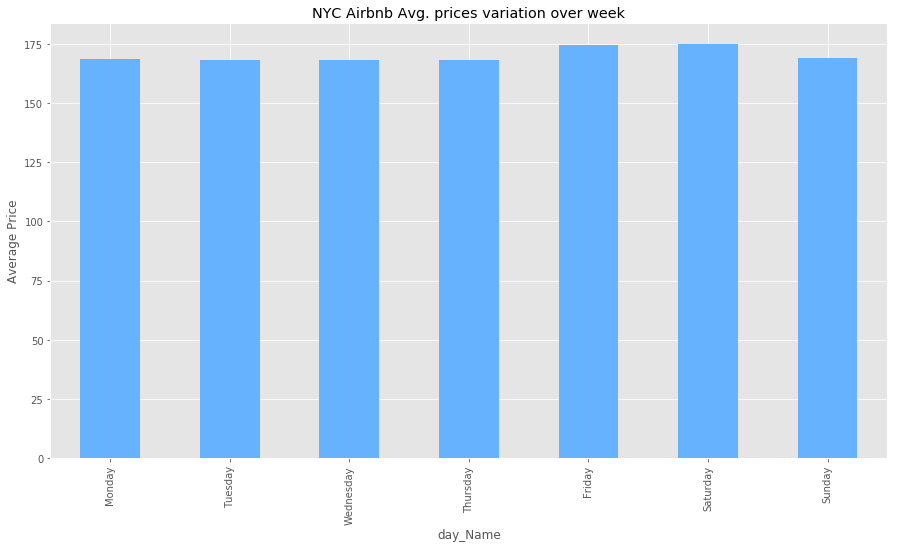

In [26]:
#Vizualize avg. price variation over a week

%matplotlib inline

matplotlib.style.use('ggplot')

objects = dDf['day_Name']
y_pos = dDf['Average_Price']

dDf.plot(kind='bar', 
           x='day_Name',
           y='Average_Price',
           color = '#67b2fe', 
           figsize =(15,8), 
           title = 'NYC Airbnb Avg. prices variation over week', 
           legend = False)
plt.ylabel('Average Price')

In [23]:
#Analysis of avg. price during holidays

holDf=calendarDetailDF.groupby('us_holidays_name').listing_id.count()
holDf=holDf.reset_index()
holDf=holDf.sort_values('listing_id',ascending=[0])
holDf


holPriceDf=calendarDetailDF.groupby('us_holidays_name').price.mean()
holPriceDf=holPriceDf.reset_index()
holPriceDf=holPriceDf.sort_values('price',ascending=[0])

holPriceDf.head(10)

,us_holidays_name,price
6,New Year's Day,190.107307
1,Columbus Day,183.851520
0,Christmas Day,176.156299
5,Memorial Day,174.246142
2,Independence Day,173.944437
3,Labor Day,173.375641
9,Veterans Day (Observed),169.133425
8,Veterans Day,168.584983
7,Thanksgiving,164.630926
10,Washington's Birthday,159.569632


Text(0,0.5,'Average Price')

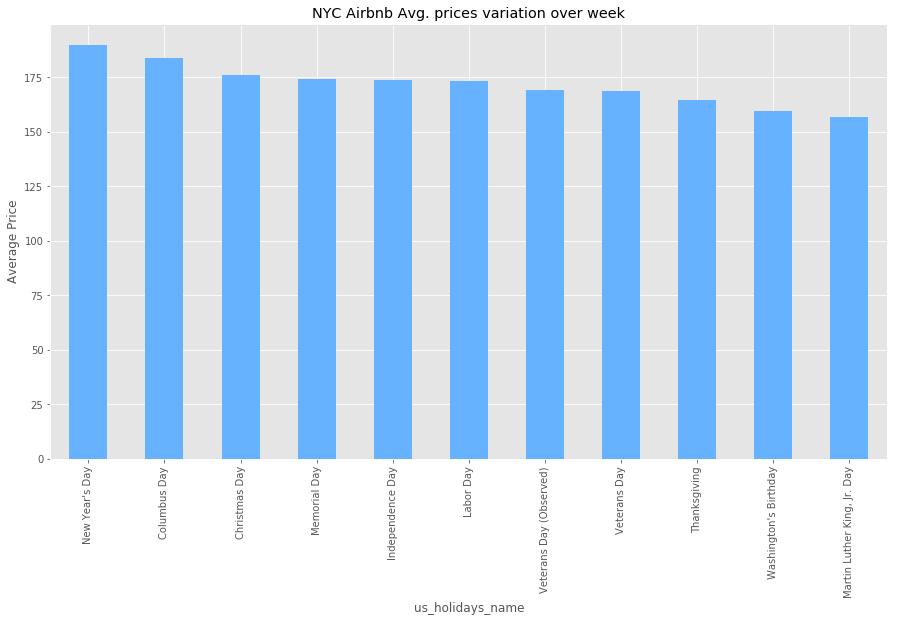

In [27]:
%matplotlib inline

matplotlib.style.use('ggplot')

objects = holPriceDf['us_holidays_name']
y_pos = holPriceDf['price']

holPriceDf.plot(kind='bar', 
           x='us_holidays_name',
           y='price',
           color = '#67b2fe', 
           figsize =(15,8), 
           title = 'NYC Airbnb Avg. prices variation over week', 
           legend = False)
plt.ylabel('Average Price')


In [ ]:
The price of listing were maximum for New Year's day, so as a customer one should avoid Airbnb on New Year Day 
on lower budget.